In [1]:
import pandas as pd

#For Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("/Users/grace/Documents/Recommender System/Data/CleanedData.csv", index_col=0)
books_df = pd.read_csv("/Users/grace/Documents/Recommender System/Data/books.csv")

/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df

,user_id,book_id,rating
0,2886,1,5
1,6158,1,5
2,3991,1,4
3,5281,1,5
4,5721,1,5
...,...,...,...
5916161,35336,10000,4
5916162,17999,10000,3
5916163,49007,10000,4
5916164,43319,10000,5


In [11]:
#Determine the number of different users 
print("Number of Users: " + str(df["user_id"].nunique())) #53424
#Determine the number of books users have rated
print("Number of Books Rated: " + str(df["book_id"].nunique())) #9814 


Number of Users: 53424
Number of Books Rated: 9814


In [60]:
#Number of Ratings
print("Total Number of Observatios: "+str(len(df))+"\n")

#Distribution of Ratings Across Books
print("Description of Frequency At Which Books Are Rated\n")
print(df.book_id.value_counts().describe())

print("\n Freqeuncy of the Bottom 10% Rate Books")
print(df.book_id.value_counts().tail(980))


Total Number of Observatios: 5916166

Description of Frequency At Which Books Are Rated

count     9814.000000
mean       602.829224
std       1272.185735
min          8.000000
25%        157.000000
50%        250.000000
75%        512.000000
max      22806.000000
Name: book_id, dtype: float64

 Freqeuncy of the Bottom 10% Rate Books
9193    117
8076    117
8083    117
6992    117
7773    117
       ... 
9553     41
9315     36
1935     33
9486     24
7803      8
Name: book_id, Length: 980, dtype: int64


The large number of observations, 5,916,166, may result in memory errors for me due to GPU RAM limitations when fitting the models. In order to avoid this issue, I will be removing a certain portion of users and books from the dataset.

As there is a large difference in the frequency at which books are rated, as seen in the median number of ratings a book receives being 250 but the most infrequently rated book receiving 8 ratings while the most freqnently rated book receiving 22806 ratings. As such, I have deicided to remove books that have been rated fewer than 100 times, this accounts for 449 of the 9814 books (4.5%)

In [64]:
#Distribution of Frequency Users Rate Books
print("Description of Frequency At Which Users Rate Books")
print(df.user_id.value_counts().describe())

print("\n Freqeuncy at Which the Bottom 10% of Users Rate Books")
print(df.user_id.value_counts().tail(5342))


## To avoid memory error, I will remove users that have made less than 50 ratings these users only consist of 4.5% of all users 

Description of Frequency At Which Users Rate Books
count    53424.000000
mean       110.739855
std         26.575303
min          1.000000
25%         95.000000
50%        110.000000
75%        127.000000
max        199.000000
Name: user_id, dtype: float64

 Freqeuncy at Which the Bottom 10% of Users Rate Books
10776    81
26305    81
39406    81
21445    81
32527    81
         ..
32925     2
34711     2
31029     2
47143     1
25856     1
Name: user_id, Length: 5342, dtype: int64


In [78]:
df.user_id.value_counts().loc[df.user_id.value_counts()<81]

13842    80
12662    80
35046    80
21438    80
52848    80
         ..
32925     2
34711     2
31029     2
47143     1
25856     1
Name: user_id, Length: 5219, dtype: int64

The bottom 10% of the frequency at which users rate books have rated less than 82 books while on average, users make 111 ratings. I decided to remove users that have made less than or equal to 80 ratings, which comprises of 5219 of the 53424 (approx 10%) of users.

Text(0.5, 1.0, 'Distribution of Ratings')

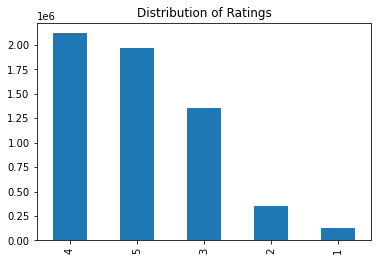

In [4]:
#Plot of Ratings Distribution
df.rating.value_counts().plot(kind='bar')
plt.title("Distribution of Ratings")

It appeares that most users tend to rate books only when they have left a favourable impression upon them. Ratings 4 and 5 tend to occur at the greatest frequency while a rating of 1 happens rather relatively infrequently. 


In [70]:
books_keepn = df.book_id.value_counts() > 99
books_keepn = books_keepn[books_keepn].index.tolist()

user_keepn = df.user_id.value_counts() > 80 
user_keepn = user_keepn[user_keepn].index.tolist()

In [71]:
df_newn = df[(df['book_id'].isin(books_keepn)) & (df['user_id'].isin(user_keepn))]

In [81]:
print(df.shape)
print(df_newn.shape)

(5916166, 3)
(5563131, 3)


By removing the bottom 4.5% of the least frequently rated books an approximately 10% of users that rate books the most infrequently, the data set has been reduced by aprroximately 6%.

In [72]:
df_newn

,user_id,book_id,rating
0,2886,1,5
1,6158,1,5
2,3991,1,4
3,5281,1,5
4,5721,1,5
...,...,...,...
5916161,35336,10000,4
5916162,17999,10000,3
5916163,49007,10000,4
5916164,43319,10000,5


In [80]:
df_newn.to_csv("/Users/grace/Documents/Recommender System/Data/DataSet.csv")

In order to identify the books found in the dataframe df_newn, a book list was created

In [84]:
book_col = ['book_id','title',"authors"]
book = books_df[book_col]

books_in = list(set(df_newn['book_id']))
book_list = book[book["book_id"].isin(books_in)] 

In [85]:
book_list

,book_id,title,authors
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
2,3,"Twilight (Twilight, #1)",Stephenie Meyer
3,4,To Kill a Mockingbird,Harper Lee
4,5,The Great Gatsby,F. Scott Fitzgerald
...,...,...,...
9994,9995,"Billy Budd, Sailor",Herman Melville
9995,9996,"Bayou Moon (The Edge, #2)",Ilona Andrews
9997,9998,The Mauritius Command,Patrick O'Brian
9998,9999,Cinderella Ate My Daughter: Dispatches from th...,Peggy Orenstein


In [86]:
book_list.to_csv("/Users/grace/Documents/Recommender System/Data/book_list.csv")